<a href="https://colab.research.google.com/github/Wis7Com/CourtCase/blob/master/01_intro_js_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#hide
! [ -e /content ] && pip install -Uqq fastbook


In [4]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [5]:
#hide
from fastbook import *

### Dog or Cat?  Classifier

In [5]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

In [6]:
dls_cat = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [ ]:
learn_cat = vision_learner(dls_cat, resnet34, metrics=error_rate)
learn_cat.fine_tune(1)  # Next time, I will use only one epoch.

epoch,train_loss,valid_loss,error_rate,time
0,0.151718,0.014955,0.004060,00:53


epoch,train_loss,valid_loss,error_rate,time
0,0.059963,0.034617,0.010825,00:59


In [ ]:
learn_cat.export('/content/gdrive/MyDrive/Colab_Notebooks/1_intro_cat_dog_model.pkl')

In [7]:
learn_cat_loaded= load_learner('/content/gdrive/MyDrive/Colab_Notebooks/1_intro_cat_dog_model.pkl')

Jupyter will always print or show the result of the last line (if there is one). For instance, here is an example of a cell that outputs an image:

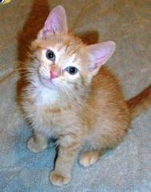

In [9]:
img = PILImage.create(image_cat())
img.to_thumb(192)

Finally, let's check that this model actually works. Go and get a photo of a dog, or a cat; if you don't have one handy, just search Google Images and download an image that you find there. Now execute the cell with `uploader` defined. It will output a button you can click, so you can select the image you want to classify:

In [10]:
#hide_output
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
# You don't have to do this! Since there is also uploaded file above in your Google Drive Folder.
# uploader = SimpleNamespace(data = ['1.intro_dog_image.jpg'])


In [11]:
learn_cat_loaded.dls = dls_cat

In [12]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn_cat_loaded.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


Congratulations on your first classifier!


### Image Segmetation Model

In [24]:
path = untar_data(URLs.CAMVID_TINY)
#dls = SegmentationDataLoaders.from_label_func(
#    path, bs=8, fnames = get_image_files(path/"images"),
#    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
#    codes = np.loadtxt(path/'codes.txt', dtype=str)
#)

def label_func(o):
    return path/'labels'/f'{o.stem}_P{o.suffix}'


In [25]:
dls_seg = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = label_func,
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

In [26]:
# Since I saved it, you can skip it.
learn_seg = unet_learner(dls_seg, resnet34)
learn_seg.fine_tune(5)

epoch,train_loss,valid_loss,time
0,3.227061,2.158859,00:01


epoch,train_loss,valid_loss,time
0,1.718736,1.604267,00:01
1,1.536618,1.360381,00:01
2,1.406655,1.175369,00:01
3,1.273921,1.059339,00:01
4,1.174214,1.038166,00:01


In [27]:
learn_seg.export('/content/gdrive/MyDrive/Colab_Notebooks/1_intro_seg_model.pkl')

In [28]:
learn_seg_loaded= load_learner('/content/gdrive/MyDrive/Colab_Notebooks/1_intro_seg_model.pkl')

In [29]:
learn_seg_loaded.dls = dls_seg

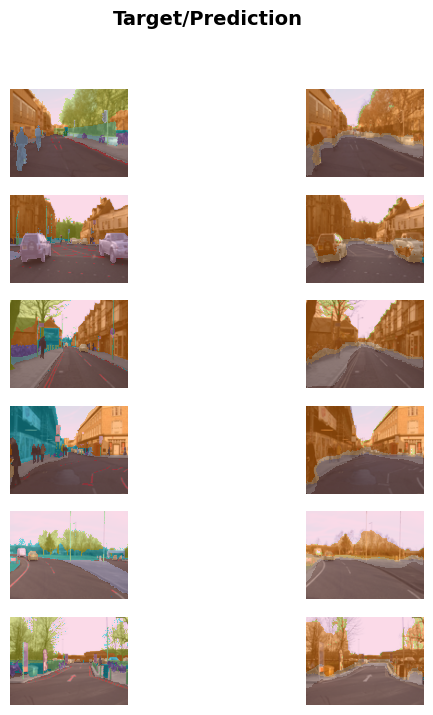

In [30]:
learn_seg_loaded.show_results(max_n=6, figsize=(7,8))

### Natural Language Processing (NLP).

The code necessary to train a model that can classify the sentiment of a movie review.

In [6]:
from fastai.text.all import *

dls_text = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=16)

In [8]:
learn_text = text_classifier_learner(dls_text, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

In [10]:
learn_text.fine_tune(3, 1e-2) # Originally, this was four(4, 1e-2).

epoch,train_loss,valid_loss,accuracy,time
0,0.472680,0.404349,0.817480,07:13


epoch,train_loss,valid_loss,accuracy,time
0,0.305657,0.270580,0.884800,12:34
1,0.250234,0.211780,0.914600,12:34
2,0.187707,0.200851,0.923920,12:34


In [11]:
learn_text.export('/content/gdrive/MyDrive/Colab_Notebooks/1_intro_text_model.pkl')

In [12]:
learn_text_loaded= load_learner('/content/gdrive/MyDrive/Colab_Notebooks/1_intro_text_model.pkl')

In [13]:
learn_text_loaded.dls = dls_text

In [14]:
learn_text_loaded.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0016, 0.9984]))

Searching for the info about a method, using `doc`

```python
doc(learn.predict)
```

This will make a small window pop up with content like this:

<img src="https://github.com/fastai/fastbook/blob/master/images/doc_ex.png?raw=1" width="600">

In [ ]:
doc(learn.predict)

### High Income Earner prediction

This will predict whether a person is a high-income earner, based on their socioeconomic background:

In [15]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

In [16]:
dls_income = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

/usr/local/lib/python3.10/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [17]:
learn_income = tabular_learner(dls_income, metrics=accuracy)

As you see, we had to tell fastai which columns are *categorical* (that is, contain values that are one of a discrete set of choices, such as `occupation`) and which are *continuous* (that is, contain a number that represents a quantity, such as `age`).

There is no pretrained model available for this task (in general, pretrained models are not widely available for any tabular modeling tasks, although some organizations have created them for internal use), so we don't use `fine_tune` in this case. Instead we use `fit_one_cycle`, the most commonly used method for training fastai models *from scratch* (i.e. without transfer learning):

In [18]:
learn_income.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.386735,0.370710,0.818028,00:04
1,0.357268,0.360177,0.831081,00:04
2,0.354868,0.351610,0.836149,00:05


In [19]:
learn_income.export('/content/gdrive/MyDrive/Colab_Notebooks/1_intro_income_model.pkl')

In [20]:
learn_income_loaded= load_learner('/content/gdrive/MyDrive/Colab_Notebooks/1_intro_income_model.pkl')

This model is using the [*Adult* dataset](http://robotics.stanford.edu/~ronnyk/nbtree.pdf), from the paper "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid" by Rob Kohavi, which contains some demographic data about individuals (like their education, marital status, race, sex, and whether or not they have an annual income greater than \$50k). The model is over 80\% accurate, and took around 30 seconds to train. -11/24-


In [21]:
learn_income_loaded.dls = dls_income
learn_income_loaded.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,11.0,3.0,14.0,1.0,5.0,1.0,1.347361,-0.469274,2.307501,1.0,1.0
1,5.0,2.0,3.0,2.0,1.0,5.0,1.0,-0.484590,-1.069246,-1.205925,0.0,0.0
2,7.0,10.0,1.0,6.0,2.0,5.0,1.0,1.127526,-1.541718,1.136359,1.0,0.0
3,5.0,1.0,3.0,4.0,1.0,5.0,1.0,-0.191478,-0.579633,-1.596306,0.0,0.0
4,5.0,10.0,3.0,5.0,1.0,5.0,1.0,-0.631146,0.119549,1.136359,1.0,1.0
5,5.0,6.0,1.0,7.0,2.0,5.0,1.0,-0.411312,0.009285,-2.377067,0.0,0.0
6,5.0,13.0,5.0,5.0,4.0,5.0,1.0,-0.924259,-0.142820,1.526739,0.0,0.0
7,7.0,12.0,3.0,4.0,1.0,5.0,1.0,1.713751,-1.023822,-0.425164,0.0,0.0
8,5.0,13.0,3.0,11.0,1.0,5.0,1.0,-0.411312,-0.318631,1.526739,1.0,1.0


### Recommendation Model: rating

Train a model that will predict movies people might like, based on their previous viewing habits, using the [MovieLens dataset](https://doi.org/10.1145/2827872):

In [22]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)

In [23]:
dls_movie = CollabDataLoaders.from_csv(path/'ratings.csv')
learn_movie = collab_learner(dls_movie, y_range=(0.5,5.5))

In [25]:
learn_movie.fine_tune(4)

epoch,train_loss,valid_loss,time
0,1.498986,1.411739,00:00


epoch,train_loss,valid_loss,time
0,1.364292,1.306090,00:00
1,1.137195,1.031308,00:00
2,0.958379,0.875546,00:00
3,0.858393,0.852917,00:00


In [26]:
learn_movie.export('/content/gdrive/MyDrive/Colab_Notebooks/1_intro_movie_model.pkl')

In [27]:
learn_movie_loaded= load_learner('/content/gdrive/MyDrive/Colab_Notebooks/1_intro_movie_model.pkl')

This model is predicting movie ratings on a scale of 0.5 to 5.0 to within around 0.6 average error. Since we're predicting a continuous number, rather than a category, we have to tell fastai what range our target has, using the `y_range` parameter.

Although we're not actually using a pretrained model (for the same reason that we didn't for the tabular model), this example shows that fastai lets us use `fine_tune` anyway in this case (you'll learn how and why this works in <<chapter_pet_breeds>>). Sometimes it's best to experiment with `fine_tune` versus `fit_one_cycle` to see which works best for your dataset.

We can use the same `show_results` call we saw earlier to view a few examples of user and movie IDs, actual ratings, and predictions:

In [28]:
learn_movie_loaded.dls = dls_movie

In [29]:
learn_movie_loaded.show_results()

,userId,movieId,rating,rating_pred
0,31.0,60.0,5.0,3.500917
1,5.0,28.0,4.0,3.283456
2,83.0,65.0,4.5,3.608413
3,100.0,25.0,3.0,3.338888
4,94.0,93.0,3.5,3.699047
5,6.0,16.0,4.5,3.724260
6,24.0,85.0,4.0,3.400438
7,11.0,94.0,3.0,3.243819
8,81.0,51.0,5.0,3.640983
